# Capstone Project (EDA and Machine Learning)

In [87]:
# Use for Data Analysis
import pandas as pd
import numpy as np

# Use for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter  # Counting

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Classifier Libraries. They are the machine learning Aglorithim
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# When it says that some functions are not there you use - !pip install, to import that function. For example:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_csv(r"C:\Users\USER\Downloads\diabetes_prediction_dataset (1).csv")

In [88]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,diabetes,scaled_bmi,scaled_HbA1c_level,scaled_BGL
0,0,80.0,0,1,4,0,0.177171,0.563636,0.272727
1,0,54.0,0,0,0,0,0.202031,0.563636,0.000000
2,1,28.0,0,0,4,0,0.202031,0.400000,0.354545
3,0,36.0,0,0,1,0,0.156863,0.272727,0.340909
4,1,76.0,1,1,1,0,0.118231,0.236364,0.340909


### Features Names

* Gender - Gender of the individual (e.g Male, Female)
  
* Age - Age of the individual in years
  
* Hypertension - Whether the individual has hypertension (0 = No, 1 = Yes)
  
* heart_disease - Whether the individual has heart disease (0 = No, 1 = Yes)
  
* Smoking_history - Smoking history of the individual (e.g 'never','former','current')
  
* bmi - Body Mass Index(BMI) of the individual

* HbA1c_level - Hemoglobin A1c level, indicating average blood sugar levels over the past 3 months
  
* blood_glucose_level - Current blood glucose level of the individual diabetes - Target variable indicating whether the individual has diabetes (0 = No, 1 = Yes)


### Data Verification

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [95]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Checking for Missing values, Visualization and Duplication of Data

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


<Axes: >

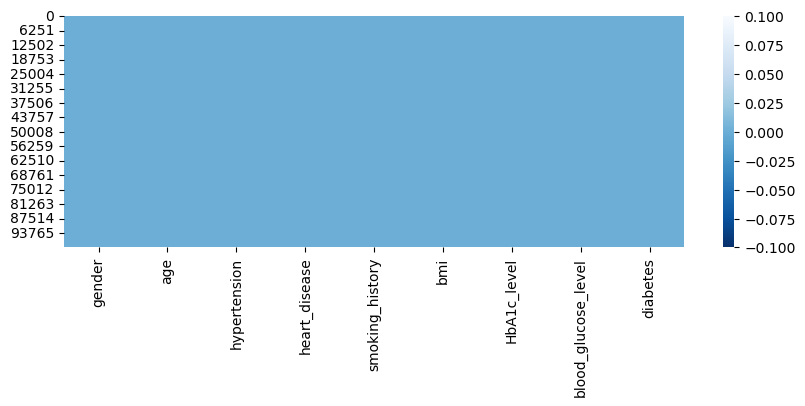

In [98]:
# Checking for missing values
print(df.isnull().sum())

# Visualizing the data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

In [99]:
# Checking for Duplicate Data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [100]:
# Suming up Duplicated Data
df.duplicated().sum()

3854

In [101]:
# Correcting Duplicated Data
df.drop_duplicates(inplace=True) 

In [106]:
df.duplicated().sum()

0

### Exploratory Data Analysis

#### Univariate Analysis

In [109]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [111]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [113]:
# Seperation of Number Colums and Categorical Columns

numerical_columns = df.select_dtypes(include="number").columns
categorical_columns = df.select_dtypes(include="object").columns

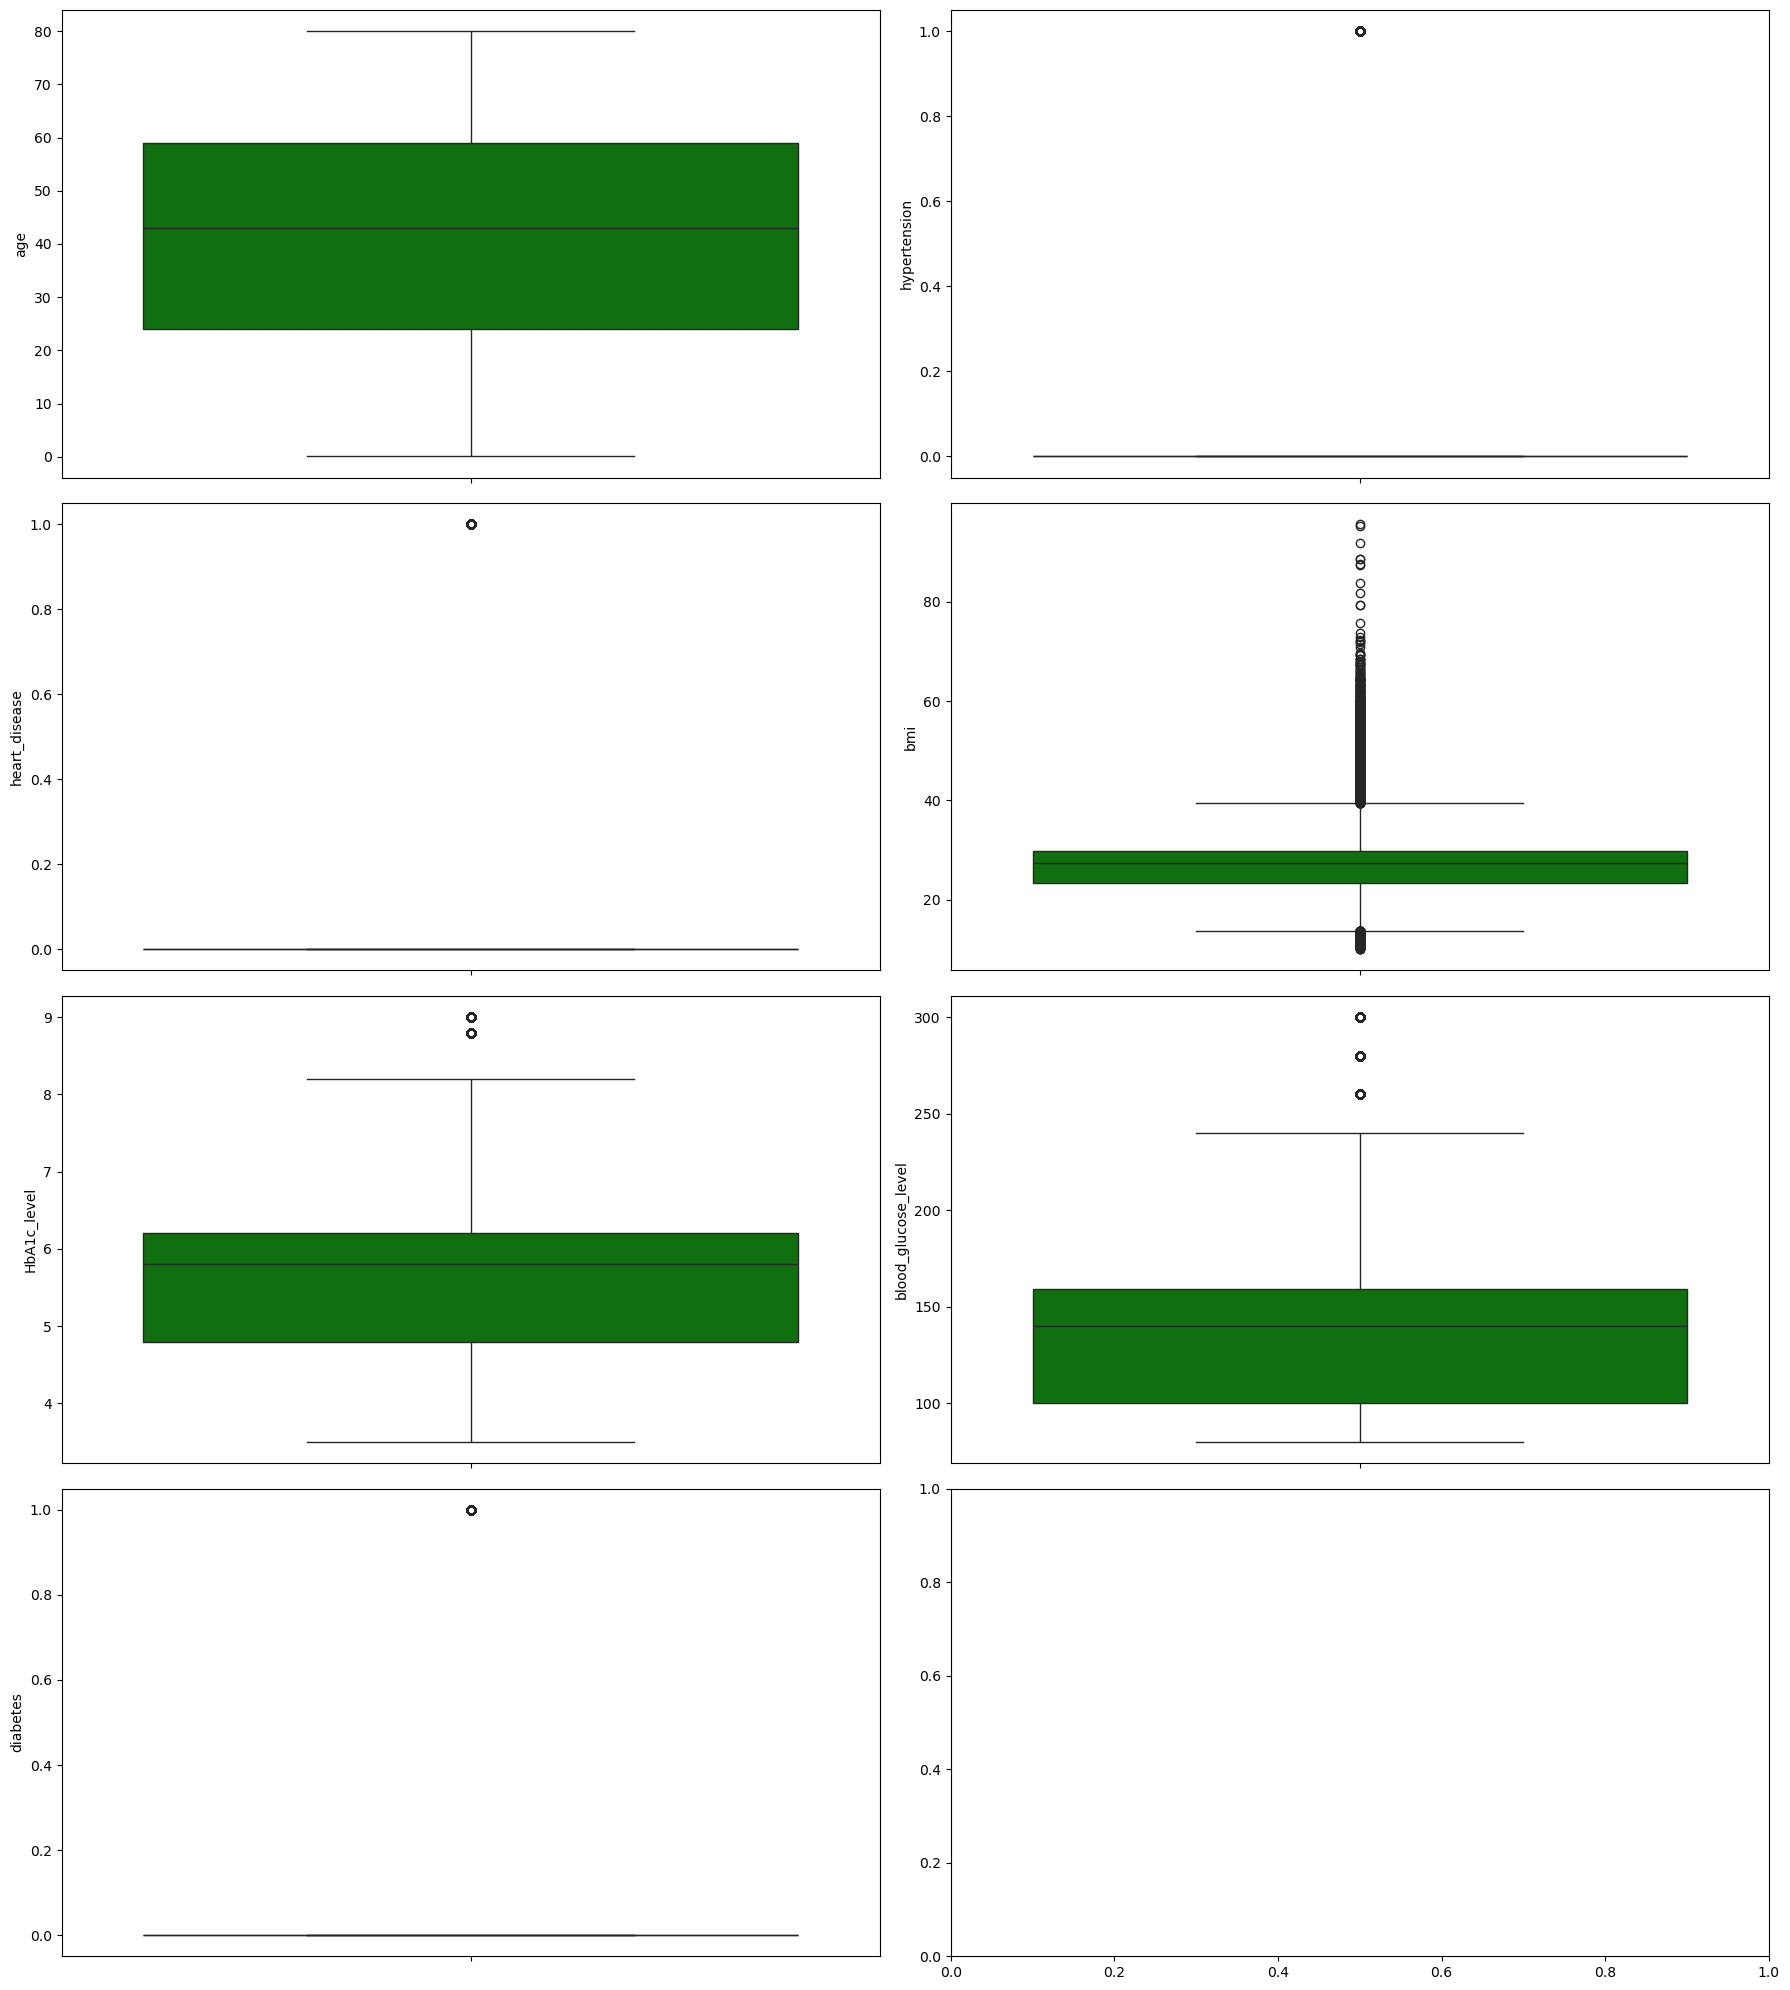

In [115]:
# Checking out for outliers.

fig, position = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.boxplot(df[column_name], color="green", ax=position[index])

plt.tight_layout()
plt.show()

The above boxplot indicated that there are outliers in blood_glucose_level, bmi, HbA1c_level, etc.

In [117]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Text(0.5, 1.0, 'Numbers of Patients')

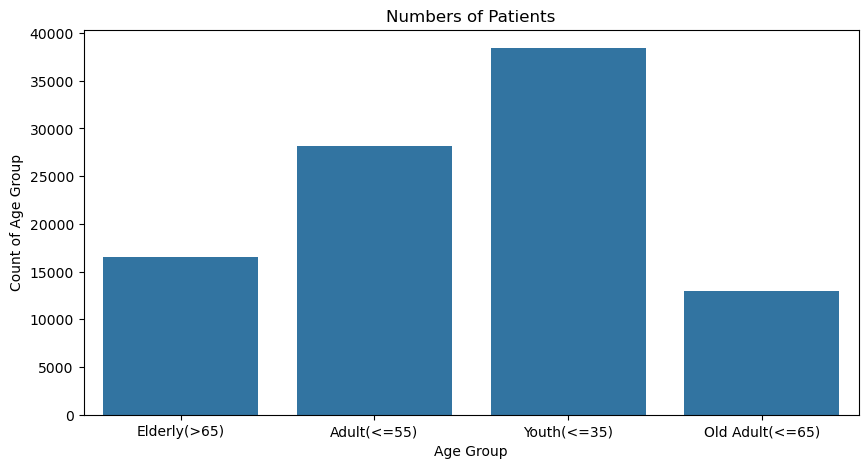

In [120]:
# Data Visualization

# Age _bracket
def age_bracket(age):
    if age <=35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

df['age_bracket'] = df['age'].apply(age_bracket)

# Investigate the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Numbers of Patients')

Text(0.5, 1.0, 'Number of patients')

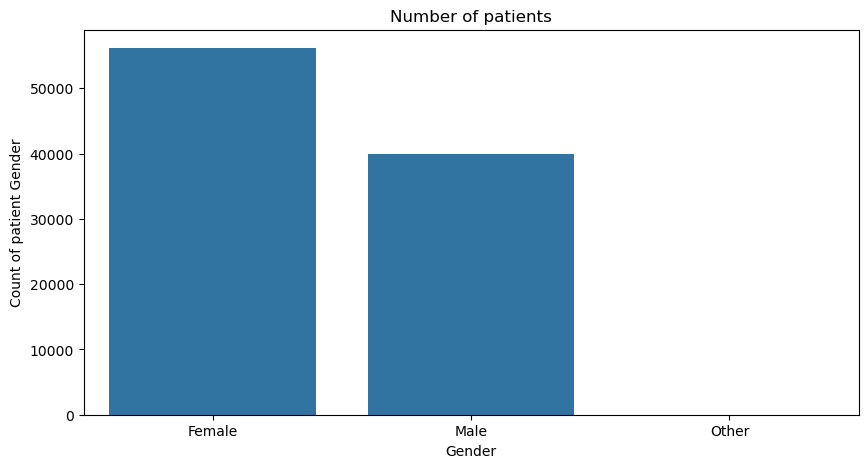

In [121]:
# Investigating the gender of patients

plt.figure(figsize = (10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Number of patients')

This shows that there are more female patients than the male.

Text(0.5, 1.0, 'Numbers of Patients')

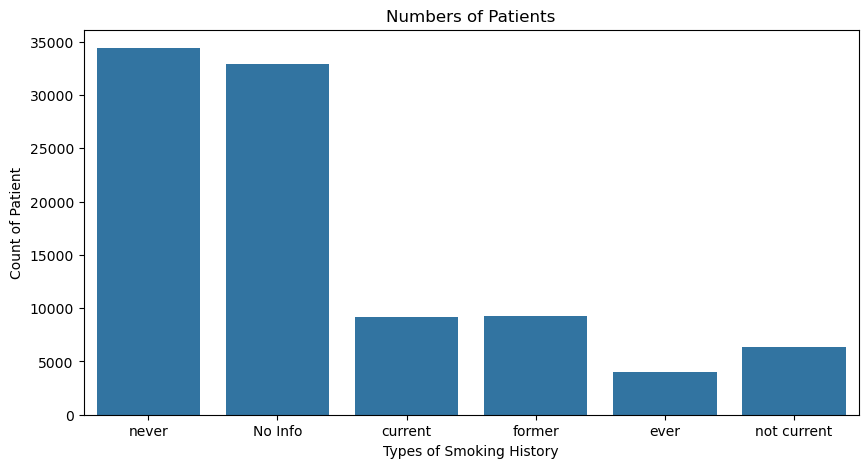

In [124]:
# Data Visualization
# Smoking_History type (1: never, 2: former, 3: current)

def smoking(smoking_history):
    if smoking_history == 1:
        return "never"
    elif smoking_history == 2:
        return "former"
    else:
        return "current"

df['smoking'] = df['smoking_history'].apply(smoking)

# Investigate the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='smoking_history', data=df)
plt.xlabel('Types of Smoking History')
plt.ylabel('Count of Patient')
plt.title('Numbers of Patients')

The above histogram shows all the patients smoking history information. This indicated that majority of the patients
have never smoke before and also majority of the patients have no information concerning their smoking history.

### Bivariate Analysis

Text(0.5, 1.0, 'Total Number of Patients')

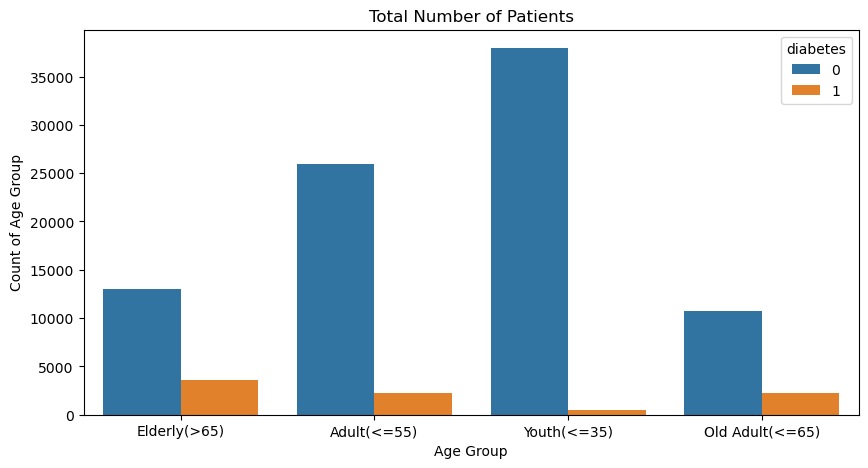

In [129]:
# Visualizing age group with diabeties
plt.figure(figsize = (10,5))
sns.countplot(x= 'age_bracket', data=df, hue='diabetes')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

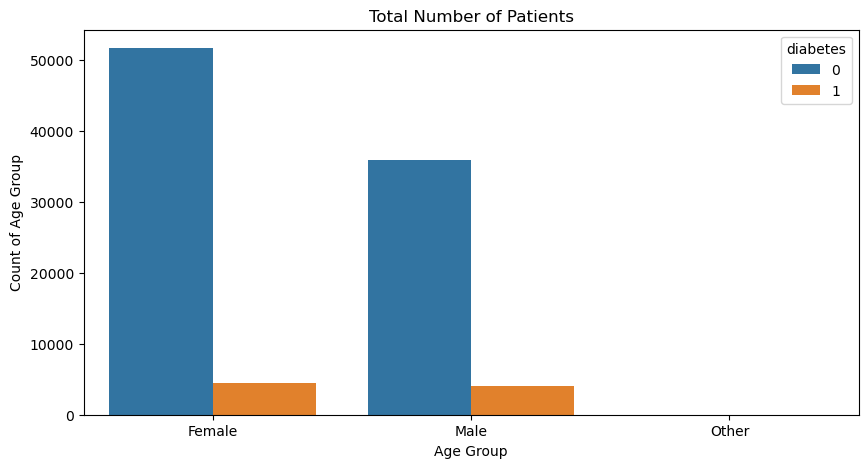

In [130]:
plt.figure(figsize = (10,5))
sns.countplot(x= 'gender', data=df, hue='diabetes')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

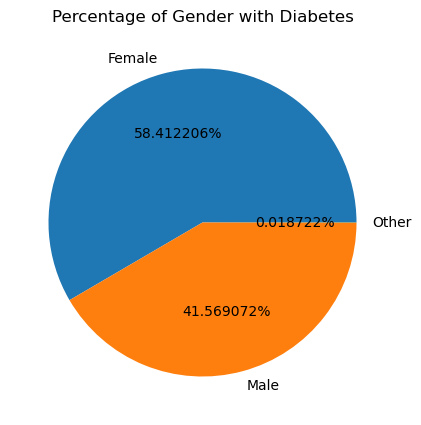

In [131]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Percentage of Gender with Diabetes")
plt.show();

This pie_chart that the femake gender with diabetes is 16.85% more than the male gender.

### Multivariate Analysis

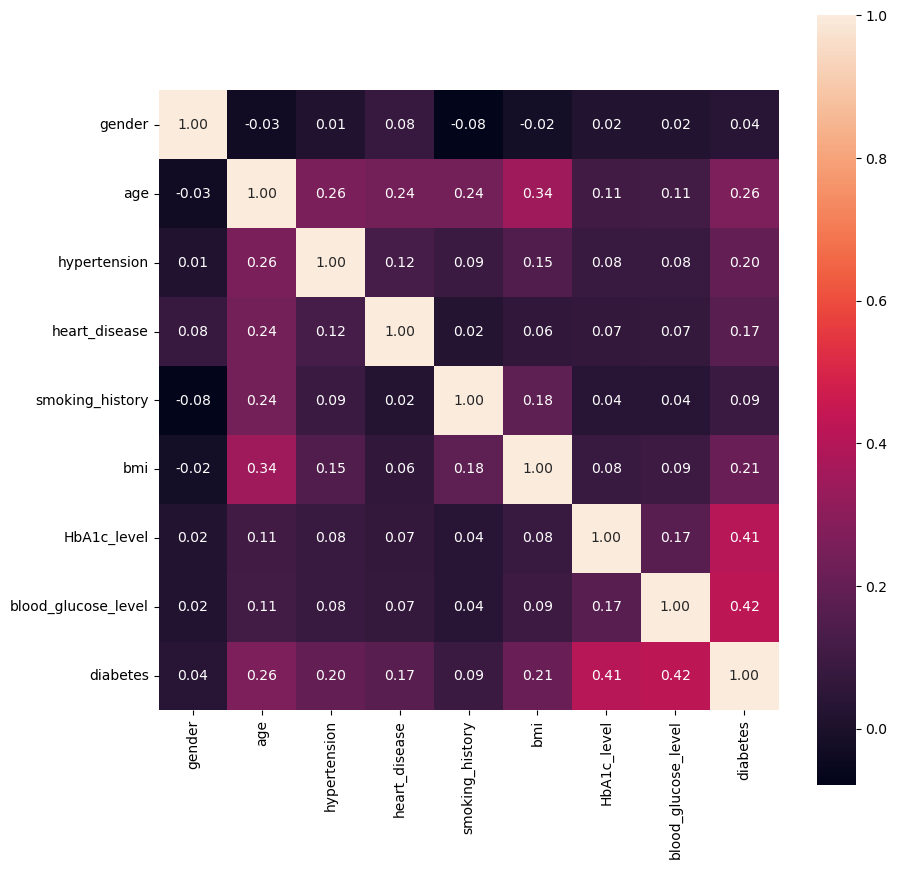

In [156]:
# Looking at the correlation between diabetes and variables in the dataset
plt.figure(figsize = (10, 10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [137]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_bracket,smoking
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly(>65),current
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult(<=55),current
2,Male,28.0,0,0,never,27.32,5.7,158,0,Youth(<=35),current
3,Female,36.0,0,0,current,23.45,5.0,155,0,Adult(<=55),current
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly(>65),current


In [139]:
df.drop(["age_bracket","smoking"], axis=1, inplace=True)

### Feature Engineering/ Data pre-processing:
* Training
* Testing



In [142]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [144]:
numerical_columns = df.select_dtypes(include="number").columns
categorical_columns = df.select_dtypes(include="object").columns

In [146]:
len(numerical_columns)

7

In [148]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [158]:
categorical_columns

Index(['gender', 'smoking_history'], dtype='object')

In [160]:
encoder = LabelEncoder()

In [162]:
for column_name in categorical_columns:
    df[column_name] = encoder.fit_transform(df[column_name])

In [164]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### Splitting into Features and Label, then Scaling for Training and Testing


<Axes: xlabel='diabetes', ylabel='count'>

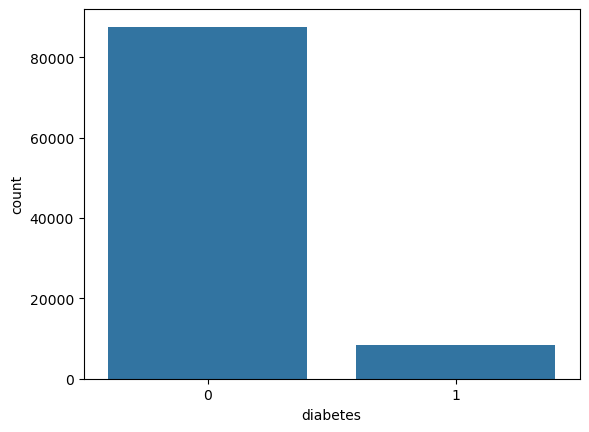

In [167]:
sns.countplot(x=df["diabetes"])

In [168]:
label = df["diabetes"]

In [169]:
features = df.drop("diabetes", axis=1)

In [172]:
label.head

<bound method NDFrame.head of 0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64>

In [174]:
features.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
5,0,20.0,0,0,4,27.32,6.6,85
6,0,44.0,0,0,4,19.31,6.5,200
7,0,79.0,0,0,0,23.86,5.7,85
8,1,42.0,0,0,4,33.64,4.8,145
9,0,32.0,0,0,4,27.32,5.0,100


In [176]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [178]:
#Dealing with outliers - 'bmi', 'HbA1c_level', 'blood_glucose_level'.

# Normalization of the Data.
scaler = MinMaxScaler()

df["scaled_bmi"] = scaler.fit_transform(df['bmi'].values.reshape(-1,1))
df["scaled_HbA1c_level"] = scaler.fit_transform(df[['HbA1c_level']].values.reshape(-1, 1))
df["scaled_BGL"] = scaler.fit_transform(df[['blood_glucose_level']].values.reshape(-1, 1))


df.drop(['bmi', 'HbA1c_level', 'blood_glucose_level'], axis=1, inplace=True)

df.head()

,gender,age,hypertension,heart_disease,smoking_history,diabetes,scaled_bmi,scaled_HbA1c_level,scaled_BGL
0,0,80.0,0,1,4,0,0.177171,0.563636,0.272727
1,0,54.0,0,0,0,0,0.202031,0.563636,0.000000
2,1,28.0,0,0,4,0,0.202031,0.400000,0.354545
3,0,36.0,0,0,1,0,0.156863,0.272727,0.340909
4,1,76.0,1,1,1,0,0.118231,0.236364,0.340909


### Machine Learning - Training and Testing

In [181]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [183]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
46612,0,35.0,0,0,0,31.53,6.6,155
31612,0,0.4,0,0,0,15.19,4.0,130
96143,0,60.0,0,0,2,20.90,6.5,100
95691,1,66.0,0,0,4,27.05,6.0,130
37658,1,48.0,0,0,5,24.05,4.8,145
...,...,...,...,...,...,...,...,...
6284,0,12.0,0,0,0,20.56,6.0,160
56182,1,62.0,0,0,3,28.34,5.7,160
79353,0,56.0,1,0,4,27.22,6.1,200
860,0,37.0,0,0,4,24.96,6.2,158


In [184]:
y_train.value_counts()

diabetes
0    70155
1     6761
Name: count, dtype: int64

In [187]:
y_test

2547     0
34774    0
71084    1
50584    0
80788    0
        ..
19314    0
17624    0
8673     0
37062    0
21353    0
Name: diabetes, Length: 19230, dtype: int64

In [189]:
y_test.value_counts()

diabetes
0    17509
1     1721
Name: count, dtype: int64

### Model Training

In [192]:
Lr_Model = LogisticRegression()

Lr_Model.fit(X_train, y_train)

predict = Lr_Model.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, predict))
print("Precision:", precision_score(y_test, predict))
print("Recall:", recall_score(y_test, predict))
print("F1-score:", f1_score(y_test, predict))
print("AUC-ROC:", roc_auc_score(y_test, predict))

Logistic Regression
Accuracy: 0.9509620384815393
Precision: 0.807753164556962
Recall: 0.5932597327135386
F1-score: 0.6840871021775544
AUC-ROC: 0.789690577990786


The prediction under LogisticRegression

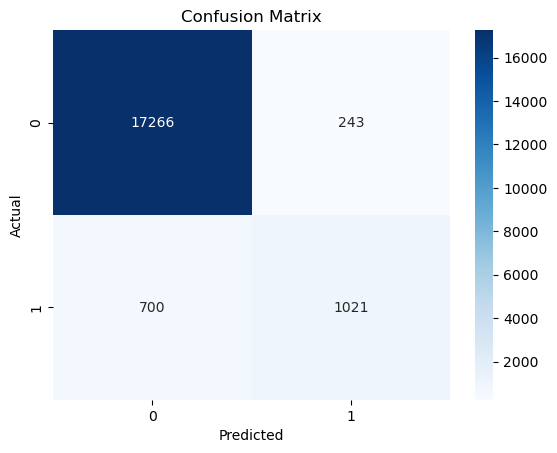

In [195]:
# Create a confusion matrix. lcm(logistics confusion matrix)

lcm = confusion_matrix(y_test, predict)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [196]:
# Model Building
# Random Forest Classifier

Rf_Model = RandomForestClassifier()

Rf_Model.fit(X_train, y_train)

predict = Rf_Model.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, predict))
print("Precision:", precision_score(y_test, predict))
print("Recall:", recall_score(y_test, predict))
print("F1-score:", f1_score(y_test, predict))
print("AUC-ROC:", roc_auc_score(y_test, predict))

Random Forest
Accuracy: 0.9686427457098284
Precision: 0.9457735247208932
Recall: 0.6891342242882045
F1-score: 0.7973109243697479
AUC-ROC: 0.8426252536713168


Prediction under RandomForest

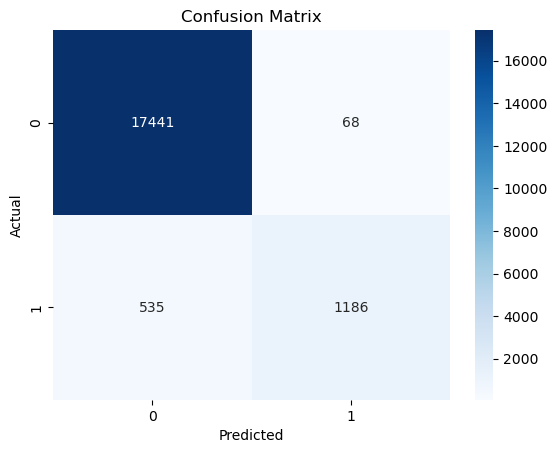

In [198]:
# rcm(RandomForest Confusion Matrix)

rcm = confusion_matrix(y_test, predict)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [199]:
# Model Building
# dcm(DecisionTree Classifier)


Dcm_Model = DecisionTreeClassifier()

Dcm_Model.fit(X_train, y_train)

predict = Dcm_Model.predict(X_test)

print("Desicion Tree")
print("Accuracy:", accuracy_score(y_test, predict))
print("Precision:", precision_score(y_test, predict))
print("Recall:", recall_score(y_test, predict))
print("F1-score:", f1_score(y_test, predict))
print("AUC-ROC:", roc_auc_score(y_test, predict))

Desicion Tree
Accuracy: 0.947321892875715
Precision: 0.695364238410596
Recall: 0.7321324811156305
F1-score: 0.713274837248797
AUC-ROC: 0.8503029188375572


Prediction under DecisionTree

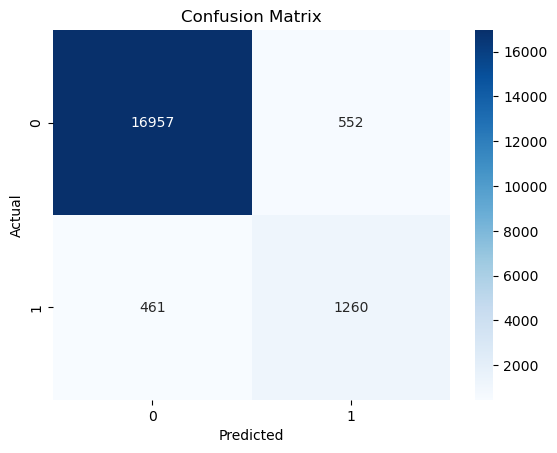

In [202]:
# dcm(DecisionTree Confusion Matrix)

dcm = confusion_matrix(y_test, predict)

# Visualize the confusion matrix
sns.heatmap(dcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Comment: The accuracy of all the three models are 90% and above making RandomForest having the highest 96%.
Also the F1-Scores are LG-68%, DT-71% and RF having the highest 79%.

The model with the best prediction so far is RandomForest.

However, due to the imbalances in the classes distribution (Diabetes) a further analysis needs to be carried out to improve 
the predictibility of the models.

### Trying to improve the classes(1 and 0) Data imbalances
This is done by informing the model to focus on minority class(1), by applying Class-Weight/Importance to it manually.

### Applying the class weights to the classifiers

<-- XGBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.96      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230



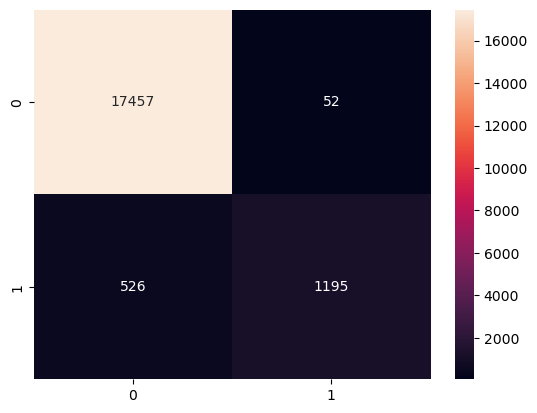

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.95      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



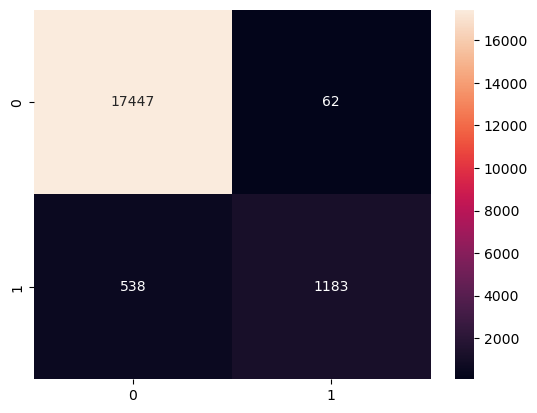

<-- Decision tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.71      0.74      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



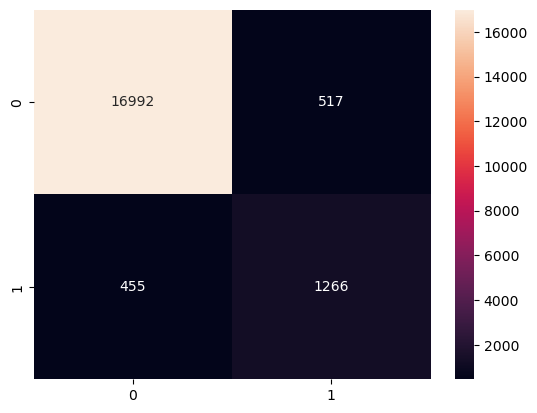

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95     17509
           1       0.53      0.72      0.61      1721

    accuracy                           0.92     19230
   macro avg       0.75      0.83      0.78     19230
weighted avg       0.93      0.92      0.92     19230



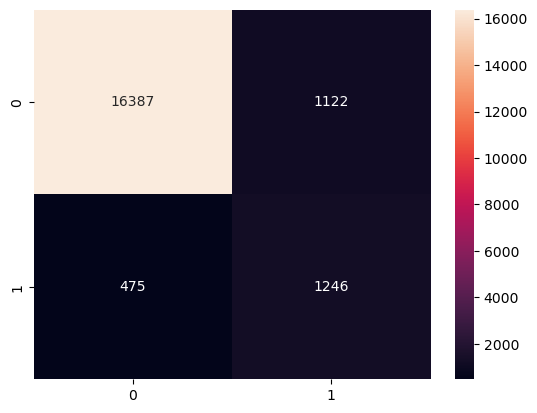

In [204]:
# Manually applying class_weights to the weaker class(1) in different classifiers

class_weights = {0: 1, 1: 4}

classifiers = [[XGBClassifier(eval_metric='mlogloss'), 'XGBoost'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
               [DecisionTreeClassifier(random_state = 42, class_weight=class_weights), "Decision tree"],
               [LogisticRegression(random_state =42, class_weight=class_weights), 'Logistic Regression']
              ]

for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt. show()



Comment: By Applying Class-Weights to the Classifiers, it has help to improve the models predictions, and so far RandomForest 
is still giving the best.

Again, one can still do further improvement on the data so that the models can have a better predictions.

### Doing further improvement on the data.
To further improvement the data we do a data balance between the minority class and the majority class through data augmentation. 
The augementation is done by oversampling the minority class to balance with the majority class.

In [208]:
!pip install imbalanced-learn

In [209]:
from imblearn.over_sampling import SMOTE

In [210]:
# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [211]:
# Initialize the Scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(features)

In [212]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [213]:
y_resampled.value_counts(normalize=True)*100

diabetes
0    50.0
1    50.0
Name: proportion, dtype: float64

In [214]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

<-- XGBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17439
           1       0.99      0.96      0.97     17627

    accuracy                           0.97     35066
   macro avg       0.98      0.97      0.97     35066
weighted avg       0.98      0.97      0.97     35066



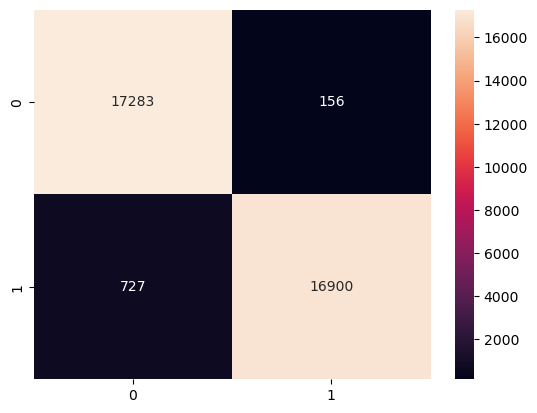

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17439
           1       0.98      0.98      0.98     17627

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



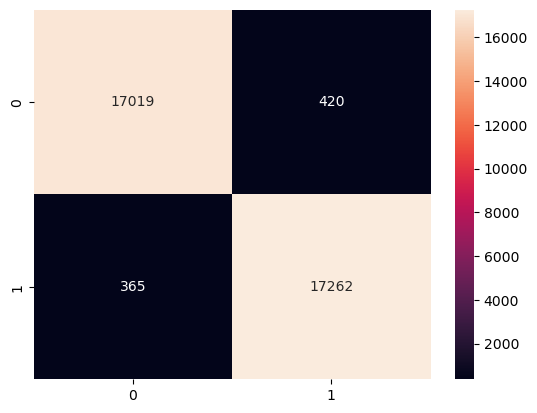

<-- Decision tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     17439
           1       0.96      0.97      0.96     17627

    accuracy                           0.96     35066
   macro avg       0.96      0.96      0.96     35066
weighted avg       0.96      0.96      0.96     35066



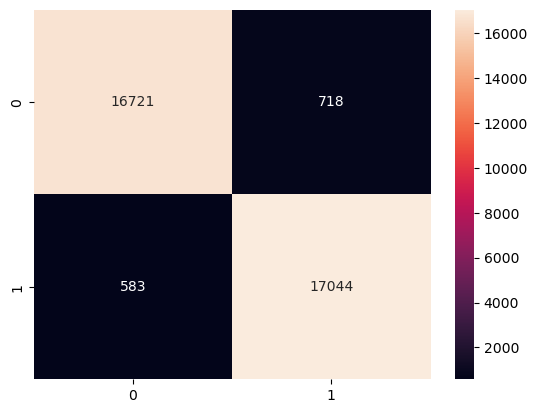

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     17439
           1       0.89      0.88      0.88     17627

    accuracy                           0.88     35066
   macro avg       0.88      0.88      0.88     35066
weighted avg       0.88      0.88      0.88     35066



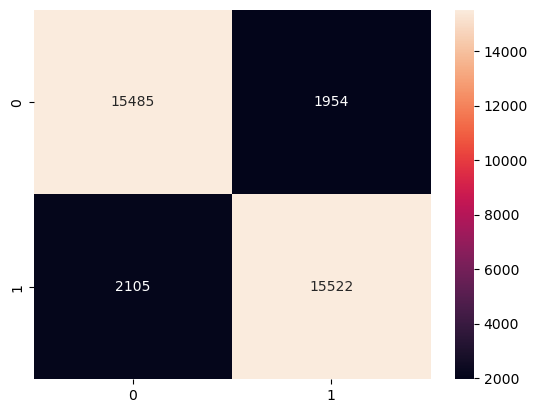

In [215]:
class_weights = "balanced"


classifiers = [[XGBClassifier(eval_metric='mlogloss'), 'XGBoost'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
               [DecisionTreeClassifier(random_state = 42, class_weight=class_weights), "Decision tree"],
               [LogisticRegression(random_state =42, class_weight=class_weights), 'Logistic Regression']
              ]

for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt. show()


Comment: The result after carrying out data balancing through oversampling of data shows an improvement in model prediction.
RandomForest is still giving the best prediction so far.



### Features Importance Ranking and Selection
This is done in order to reduce the workload on the model and to also give importance to features in the data depending on which model.

Since RandomForest is still the best model for the data, a feature importance ranking and selection will be carried out on it.

In [227]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,diabetes,scaled_bmi,scaled_HbA1c_level,scaled_BGL
0,0,80.0,0,1,4,0,0.177171,0.563636,0.272727
1,0,54.0,0,0,0,0,0.202031,0.563636,0.000000


In [231]:
# Feature importance for Random Forest(it is the best Model so far.)
importances = classifiers[1][0].feature_importances_
importances

array([0.00499171, 0.18451075, 0.01930093, 0.00969165, 0.02421704,
       0.11542416, 0.35660275, 0.28526101])

In [233]:
feature_names = features.columns
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df

,Feature,Importance
0,gender,0.004992
1,age,0.184511
2,hypertension,0.019301
3,heart_disease,0.009692
4,smoking_history,0.024217
5,bmi,0.115424
6,HbA1c_level,0.356603
7,blood_glucose_level,0.285261


In [235]:
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df

,Feature,Importance
6,HbA1c_level,0.356603
7,blood_glucose_level,0.285261
1,age,0.184511
5,bmi,0.115424
4,smoking_history,0.024217
2,hypertension,0.019301
3,heart_disease,0.009692
0,gender,0.004992


<Axes: xlabel='Importance', ylabel='Feature'>

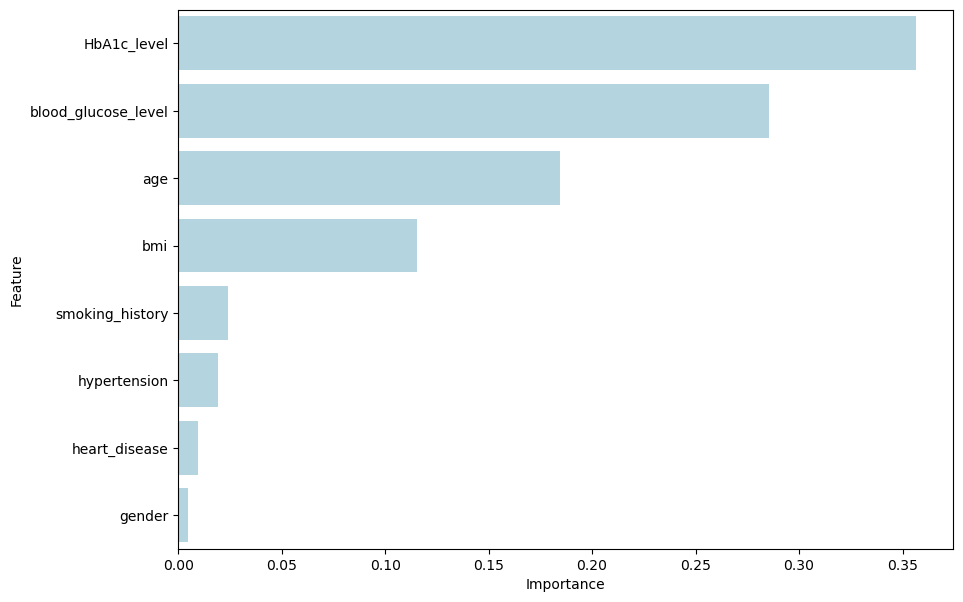

In [237]:
plt.figure(figsize=(10, 7))

sns.barplot(x='Importance', y='Feature', data=feature_importances_df, color='lightblue')

Comments: According to the outcome of features sliming and importance using RandomForest Model, HbA1c_level, blood_glucose_level, age, 
bmi(Body Mass Index) have a very strong influence and importance in the prediction of patients having Diabetes.

### Correlation Analysis

<Axes: >

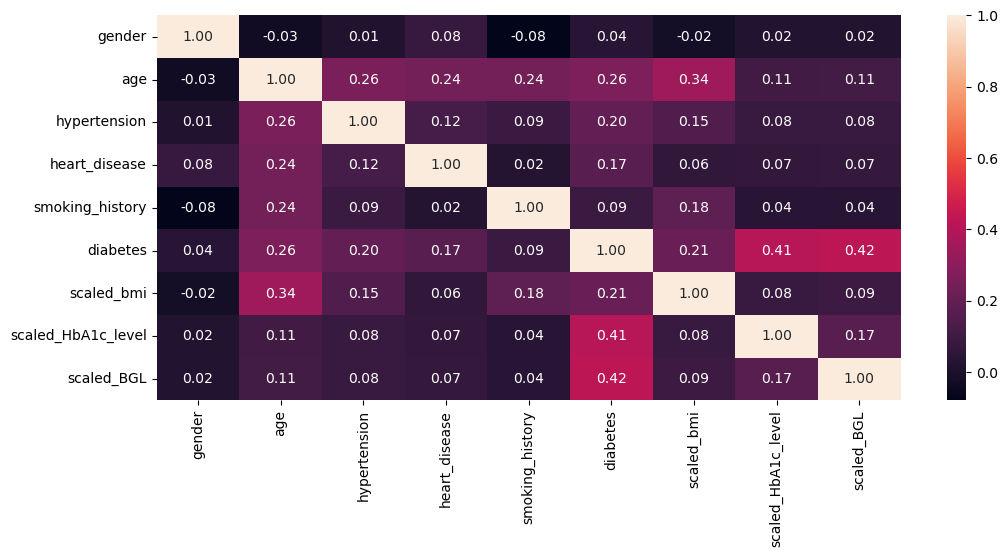

In [239]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")

Comment: The above correlation is showing the relationship among the variables.
Looking at the relationship between Diabetes and the other variables, we can see that 'scaled HbA1c level' and 'scaled BGL'
followed by Age, bmi(Body Mass Index) and Hypertension have high correlation with diabetes compare to the other variables.
This indicate that, patients with high level of 'HbA1c_level', 'blood_glucose_level(BGL)', Age, hypertension and bmi(Body Mass Index) are more susceptible to having diabetes.

In conclusion, the best model for prediction on patients data is RandomForest because it has a 98% in its Classification Report.